# Heart Failure Detection

## Sumber Dataset : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Latar Belakang :
Penyakit Jantung merupakan penyakit nomor 1 yang menyebabkan kematian secara global https://lifestyle.kompas.com/read/2020/12/14/101607520/penyakit-jantung-penyebab-kematian-utama-di-dunia?page=all, disebutkan bahwa perkiraan 17,9 juta orang meninggal setiap tahun dikarenakan penyakit jantung, yang dimana ini merupakan 31% dari kematian di seluruh dunia. Gagal Jantung merupakan salah satu jenis dari penyakit jantung yang dimana penyebab nya bisa banyak faktor dan di dataset ini mengunakan 12 faktor yang dapat memprediksi gagalnya jantung.

Orang yang mempunyai penyakit jantung dan disertai penyakit pengikut lainnya seperti hypertensi, diabetes, anemia , dll. Mereka perlu untuk melakukan deteksi dini terhadap resiko terkenanya gagal jantung yang bisa menyebabkan kematian, sehingga dengan machine learning pendeteksian gagal jantung dapat terwujud dan dapat memberi prediksi agar penderita penyakit jantung dapat menjaga kesehatannya.

### Dataset:
Dataset ini memiliki 13 variabel diantaranya 12 variabel merupakan faktor penyebab , 1 variabel adalah hasil diagnosa apakah pasien tersebut meninggal atau tidak

Variables in this dataset:
##### Age: Age of the patient in years
##### Anaemia: Decrease of red blood cells or hemoglobin (0:Reduced or 1:Normal)
##### creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
##### Diabetes: If the patient has diabetes (0:No or 1:Yes)
##### ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
##### high_blood_pressure: If the patient has hypertension (0:No or 1:Yes)
##### platelets: Platelets in the blood (kiloplatelets/mL)
##### serum_creatinine: Level of serum creatinine in the blood (mg/dL)
##### serum_sodium: Level of serum sodium in the blood (mEq/L)
##### sex: Biological sex of the patient (0:Female or 1:Male)
##### smoking: If the patient is a smoker (0:No or 1: Yes)
##### time: Follow-up period in days
##### death_event: If the patient survived till the end of follow-up period (0:No or 1:Yes )

Penjelasan Variabel tersebut diambil dari : Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

### Melakukan Import Library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report

### Melakukan Import Dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

### Melakukan Data Analisis dan Visualisasi Data

#### Mencetak 5 Data teratas

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Data terdiri dari 299 baris dan 13 kolum

In [4]:
df.shape

(299, 13)

#### Dataset tersebut memiliki 3 kolum yang berisi data float, dan 9 kolum berisi data interger

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Merubah nama kolum DEATH_EVENT menjadi death_event

In [6]:
df.rename(columns={'DEATH_EVENT':'death_event'},inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Melakukan pengecekan apakah ada data kosong pada dataset

##### Hasil menunjukan bahwa tidak ada data kosong pada dataset

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

#### Mengecek distribusi data

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Mencetak 10 sample acak dari dataset

In [9]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
114,60.0,1,754,1,40,1,328000.0,1.2,126,1,0,91,0
110,85.0,0,129,0,60,0,306000.0,1.2,132,1,1,90,1
36,90.0,1,60,1,50,0,226000.0,1.0,134,1,0,30,1
26,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
201,45.0,0,308,1,60,1,377000.0,1.0,136,1,0,186,0
191,64.0,1,62,0,60,0,309000.0,1.5,135,0,0,174,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
172,70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146,0


#### Menampilkan nilai unique dari masing" kolum di dalam dataset

#### Bisa dilihat bahwa untuk umur, creatinine_phosphokinase, platelets, time memiliki paling banyak nilai unique dan anaemia, diabetes, high_blood_pressure, sex, smoking, death_event mempunyai 2 nilai unique yaitu 0 atau 1 jadi Ya atau tidak saja

In [10]:
for i in df.columns:
  print(i,df[i].nunique())

age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
death_event 2


#### Dataset yang diberikan tersebut bersifat imbalanced dimana kita bisa lihat bahwa salah satu data masih lebih banyak dari data lain. Disini bisa dilihat bahwa dari dataset tersebut jumlah kematian mencapai 96 pasien dan pasien tidak meninggal adalah 203 pasien. Sehingga di dataset tersebut kebanyakan pasien tidak meninggal dibandingkan meninggal.

0    203
1     96
Name: death_event, dtype: int64

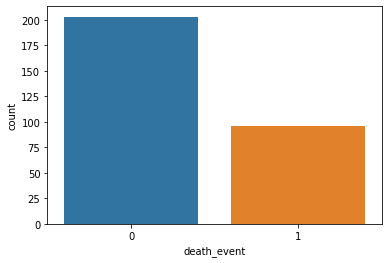

In [11]:
sns.countplot(x= df["death_event"])
df["death_event"].value_counts()

#### Jumlah yang merokok di dalam dataset tersebut adalah sebanyak 96 pasien dan 203 lainnya tidak merokok

0    203
1     96
Name: smoking, dtype: int64

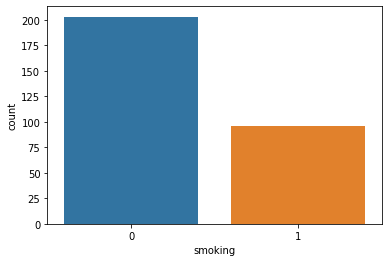

In [12]:
sns.countplot(x= df["smoking"])
df["smoking"].value_counts()

#### Disini kita bisa lihat bahwa orang yang tidak merokok malah memiliki tingkat kematian lebih tinggi dari pada orang yang tidak merokok.

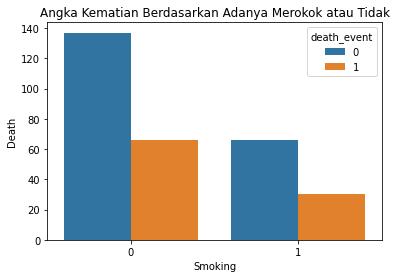

In [13]:
sns.countplot(x= df["smoking"],hue=df["death_event"])
plt.title('Angka Kematian Berdasarkan Adanya Merokok atau Tidak')
plt.xlabel('Smoking')
plt.ylabel('Death')
plt.show()

#### Data tersebut menunjukan bahwa pasien yang tidak memiliki anaemia sebanyak 170 pasien dan sisanya 129 memiliki penyakit anaemia

0    170
1    129
Name: anaemia, dtype: int64

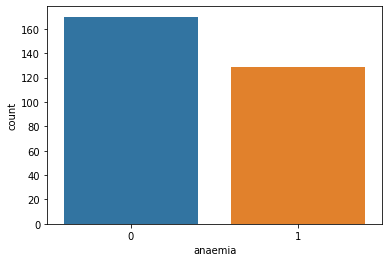

In [14]:
sns.countplot(x= df["anaemia"])
df["anaemia"].value_counts()

#### Disini kita bisa lihat bahwa pasien yang memiliki anemia dan tidak memiliki anemia memiliki angka kematian yang hampir sama

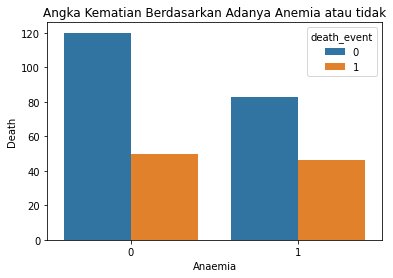

In [15]:
sns.countplot(x= df["anaemia"],hue=df["death_event"])
plt.title('Angka Kematian Berdasarkan Adanya Anemia atau tidak')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

#### Data tersebut menunjukan bahwa pasien yang memiliki penyakit diabetes adalah sebanyak 125 pasien dan sisanya 174 pasien tidak memiliki penyakit diabetes

0    174
1    125
Name: diabetes, dtype: int64

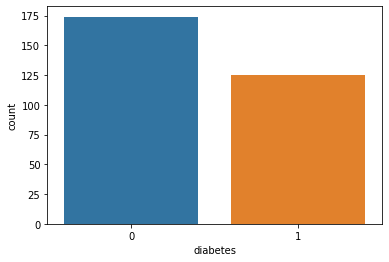

In [16]:
sns.countplot(x= df["diabetes"])
df["diabetes"].value_counts()

#### Disini menunjukan bahwa angka kematian dikarenakan tidak adanya penyakit diabetes lebih tinggi dibandingkan dengan adanya penyakit diabetes

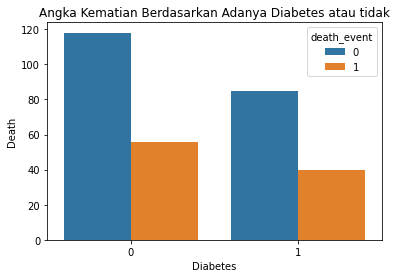

In [17]:
sns.countplot(x= df["diabetes"],hue=df["death_event"])
plt.title('Angka Kematian Berdasarkan Adanya Diabetes atau tidak')
plt.xlabel('Diabetes')
plt.ylabel('Death')
plt.show()

#### Data menunjukan bahwa jumlah pasien yang memiliki darah tinggi adalah sebanyak 105 pasien dan sisanya 194 pasien tidak memiliki penyakit darah tinggi

0    194
1    105
Name: high_blood_pressure, dtype: int64

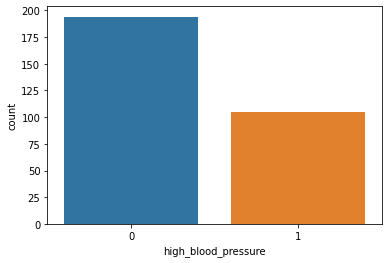

In [18]:
sns.countplot(x= df["high_blood_pressure"])
df["high_blood_pressure"].value_counts()

#### Disini menunjukan bahwa angka kematian dikarenakan adanya darah tinggi adalah sangat rendah, dimana pasien yang tidak memiliki darah tinggi memiliki angka kematian yang lebih tinggi

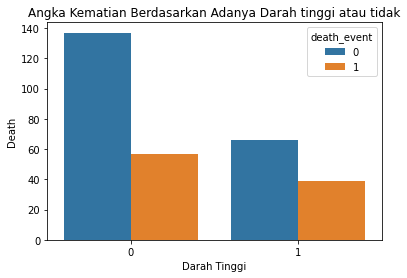

In [19]:
sns.countplot(x= df["high_blood_pressure"],hue=df["death_event"])
plt.title('Angka Kematian Berdasarkan Adanya Darah tinggi atau tidak')
plt.xlabel('Darah Tinggi')
plt.ylabel('Death')
plt.show()

#### Data tersebut menunjukan bahwa laki-laki lebih banyak memiliki penyakit jantung dengan jumlah pasien mencapai 194 pasien dan wanita sebanyak 105 pasien.

1    194
0    105
Name: sex, dtype: int64

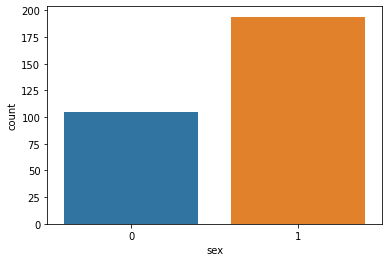

In [20]:
sns.countplot(x= df["sex"])
df["sex"].value_counts()

#### Disini menunjukan bahwa Laki-Laki lebih berpotensi meninggal karena gagal jantung dibandingkan dengan wanita

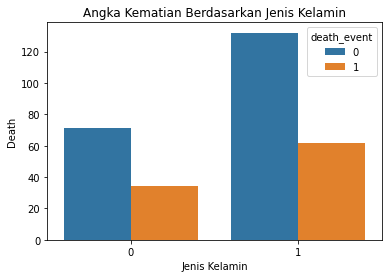

In [21]:
sns.countplot(x= df["sex"],hue=df["death_event"])
plt.title('Angka Kematian Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Death')
plt.show()

### Mencari Korelasi Antar Data

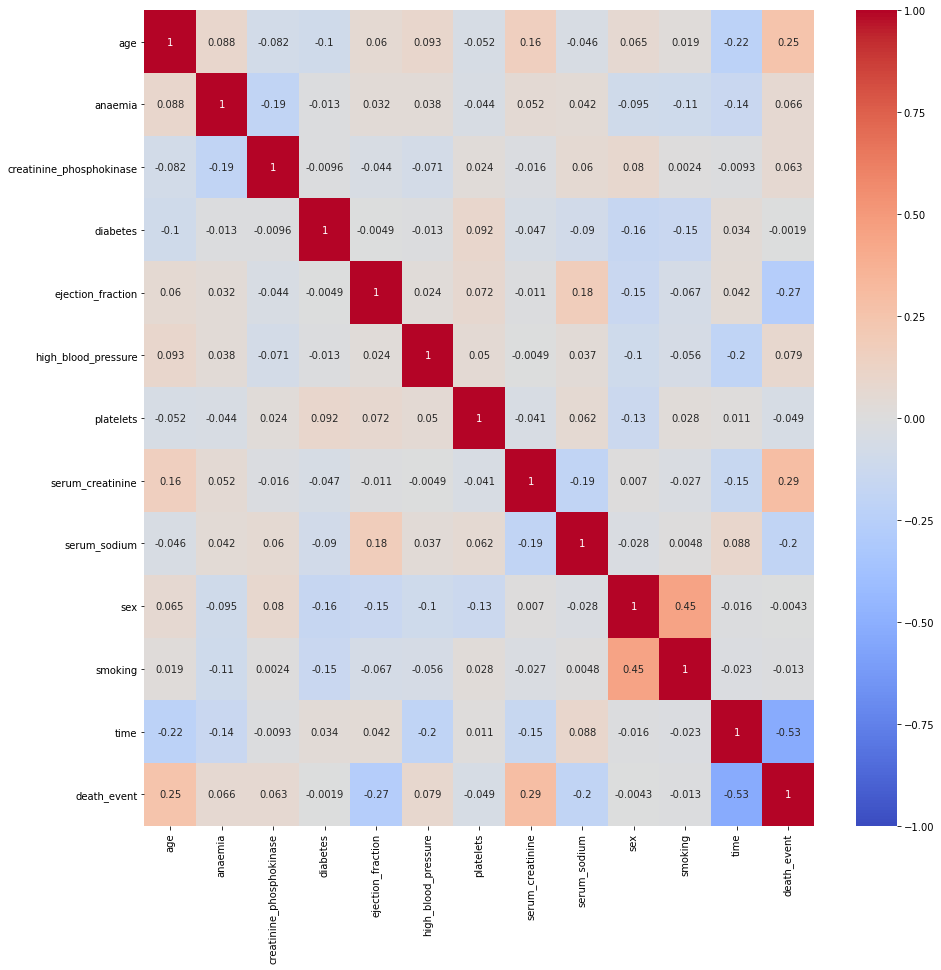

In [22]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

### Mengambil Nilai Korelasi yang >0.1 dan <-0.1

In [23]:
corr[abs(corr['death_event']) > 0.1]['death_event']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
death_event          1.000000
Name: death_event, dtype: float64

#### Disini menunjukan bahwa variabel [age, ejection_fraction, serum_creatinine, serum_sodium, time] memiliki pengaruh yang cukup kuat terhadap [death_event]/kematian 
#### Jadi bisa dikatakan 5 variabel diatas tersebut memiliki pengaruh kuat dalam menyebabkan seseorang meninggal karena gagal jantung

### Mencetak pembagian meninggal atau tidak meninggal berdasarkan umur

<AxesSubplot:xlabel='death_event', ylabel='age'>

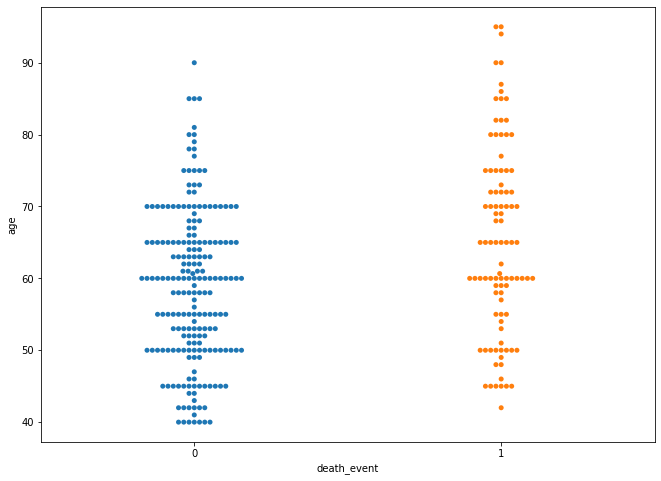

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.swarmplot(x = 'death_event', y ='age', data = df)

#### Disini kita bisa lihat bahwa kebanyakan umur 40-70 tidak meninggal dan untuk meninggal kebanyakan berada di kisaran umur 40an-60an

### Mencetak pembagian meninggal atau tidak meninggal berdasarkan ejection_fraction

<AxesSubplot:xlabel='death_event', ylabel='ejection_fraction'>

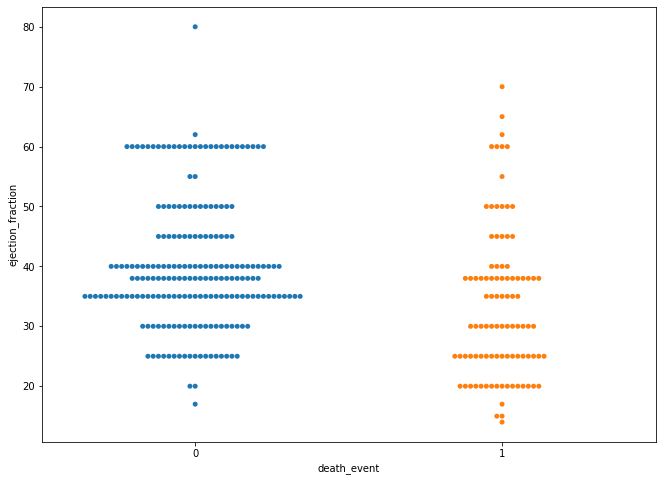

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.swarmplot(x = 'death_event', y ='ejection_fraction', data = df)

#### Disini menyatakan bahwa ketika jumlah persentasi darah yang keluar dari jantung perkontrasi di range 10-40 persen maka jumlah kematian akan sanggat tinggi terutama di 20-30 persen

### Mencetak pembagian meninggal atau tidak meninggal berdasarkan serum_creatinine

<AxesSubplot:xlabel='death_event', ylabel='serum_creatinine'>

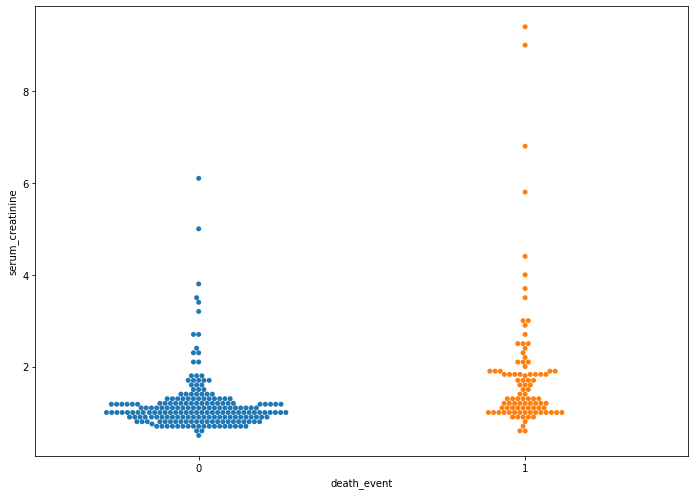

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'death_event', y ='serum_creatinine', data = df)

#### Disini menyatakan bahwa ketika nilai serum_creatinine di darah kita makin tinggi maka peluang untuk meninggal dikarenakan gagal jantung akan makin besar

### Mencetak pembagian meninggal atau tidak meninggal berdasarkan serum_sodium

<AxesSubplot:xlabel='death_event', ylabel='serum_sodium'>

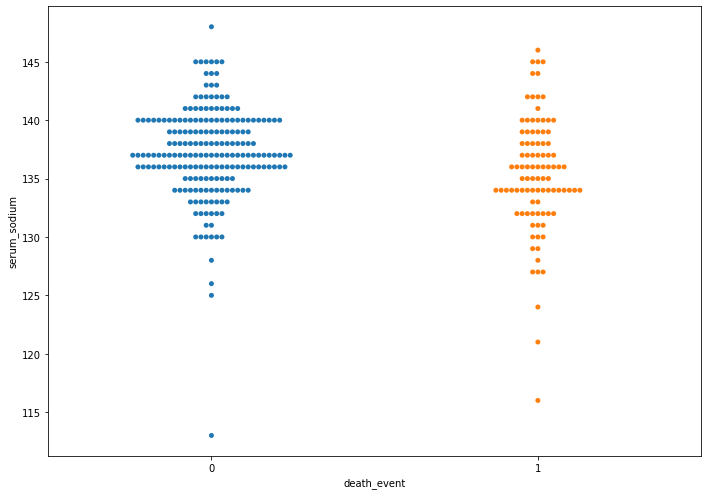

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'death_event', y ='serum_sodium', data = df)

#### Disini menyatakan bahwa ketika nilai serum_sodium makin rendah di dalam darah maka peluang kematian akibat gagal jantung akan semakin besar

### Mencetak pembagian meninggal atau tidak meninggal berdasarkan time (lamanya waktu sakit)

<AxesSubplot:xlabel='death_event', ylabel='time'>

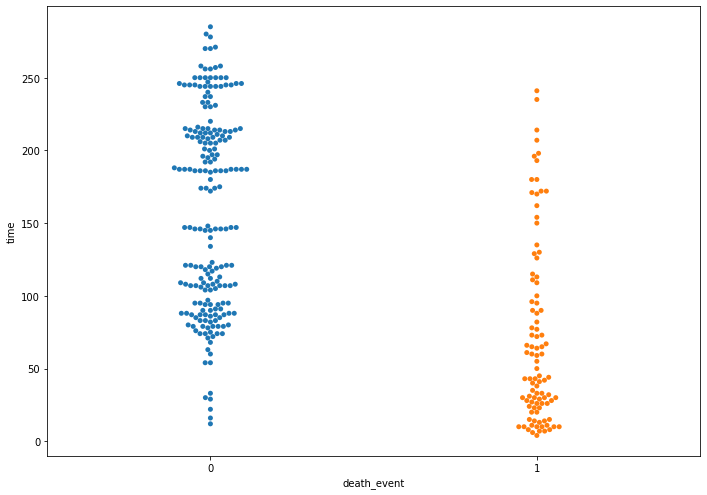

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'death_event', y ='time', data = df)

#### Disini menunjukan kebanyakan yang meninggal adalah pasien" yang waktu dia sakit masih awal-awal dibandingkan pasien yang sudah lama terdiagnosa, sehingga disini menunjukan bahwa kita harus membuat suatu solusi agar dapat dilakukan pendeteksian awal jika melihat data tersebut

### Mengecek Outlier (Data-data luaran yang dapat menganggu ketika dilakukannya training sehingga hasilnya menjadi tidak konsisten dan tidak akurat)

#### Outlier Umur

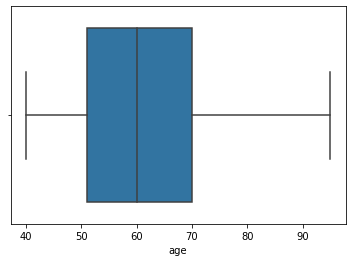

In [29]:
sns.boxplot(x = df.age)
plt.show()

#### Untuk data umur tidak memiliki Outlier dan data berpusat pada umur 50-70

#### Outlier Ejection Fraction

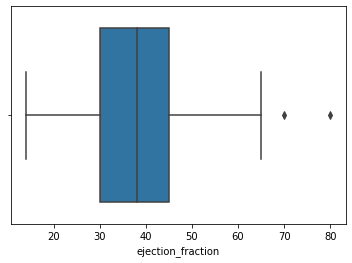

In [30]:
sns.boxplot(x = df.ejection_fraction)
plt.show()

#### Untuk data Ejection Fraction memiliki outlier yaitu 80 dan 70 sebanyak masing-masing satu data

In [31]:
df[df['ejection_fraction']>70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0


#### Outlier Serum Creatinine

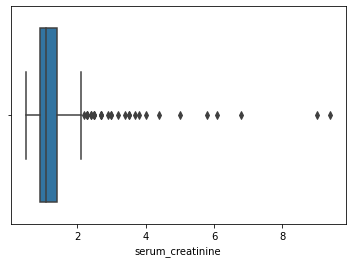

In [32]:
sns.boxplot(x = df.serum_creatinine)
plt.show()

#### Untuk data Serum Creatinine kita tidak menghapus outliernya dikarenakan berdasarkan data dari https://www.medicinenet.com/creatinine_blood_test/article.htm menununjukan bahwa serum_creatinine diatas 5 menunjukan adanya gejala yang tidak wajar pada jantung sehingga data outlier tersebut tidak dihapus karena bersifat valid dan membantu training

In [33]:
df[df['serum_creatinine']>=2]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
28,58.0,1,60,0,38,0,153000.00,5.8,134,1,0,26,1
31,85.0,0,23,0,45,0,360000.00,3.0,132,1,0,28,1
35,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30,1
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
39,60.0,0,235,1,38,0,329000.00,3.0,142,0,0,30,1
48,80.0,1,553,0,20,1,140000.00,4.4,133,1,0,41,1


#### Outlier Serum Sodium

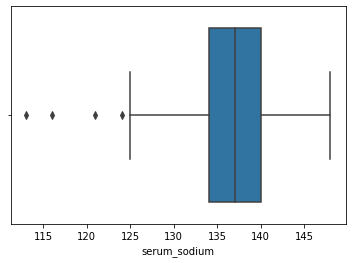

In [34]:
sns.boxplot(x = df.serum_sodium)
plt.show()

#### Untuk data Serum Sodium memiliki 4 outlier yang outlier diantara 120-125 adalah outlier pendukung training dan lebih kecil dari 120 adalah outlier yang harus dibuang

In [35]:
df[df['serum_sodium']<=125]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1
126,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0
225,75.0,0,675,1,60,0,265000.00,1.4,125,0,0,205,0


#### Outlier Waktu

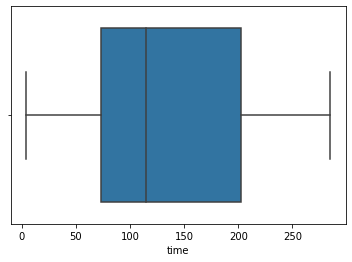

In [36]:
sns.boxplot(x = df.time)
plt.show()

#### Untuk data waktu tidak memiliki Outlier dan data berpusat pada 70-200 hari

### Melakukan penghapusan outlier yang tidak diperlukan untuk training model

In [37]:
df = df[df['ejection_fraction']<=70]
df = df[df['serum_sodium']>=120]

In [38]:
df.shape

(296, 13)

#### Setelah data dibuang maka sisa data yang dapat digunakan adalah sebanyak 296 data pasien

## Model Training dan Prediksi

### Melakukan pembagian dataframe menjadi X dan Y , X yang dimana berisi variabel yang datanya memiliki korelasi yang kuat dengan death_event, Y dimana berisi label death_event

In [39]:
x = df[['age','ejection_fraction','serum_creatinine','serum_sodium','time']]
y = df['death_event']

#### Disini kita bisa lihat bahwa untuk x memiliki sisa kolum yaitu : ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], sedangan y memiliki 1 kolum yang memiliki nilai 0 (Tidak meninggal) atau 1 (meninggal) saja 

In [40]:
x.columns , y

(Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], dtype='object'),
 0      1
 1      1
 2      1
 3      1
 5      1
       ..
 294    0
 295    0
 296    0
 297    0
 298    0
 Name: death_event, Length: 296, dtype: int64)

### Melakukan Splitting Dataset ke training set dan testing set dengan jumlah testing sebesar 30% dari dataset dan 70% sisanya untuk training

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.3, random_state=2)

#### Setelah dilakukan Splitting maka untuk training memiliki 207 data, Untuk testing memiliki 89 data

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((207, 5), (89, 5), (207,), (89,))

In [43]:
x_train, x_test

(      age  ejection_fraction  serum_creatinine  serum_sodium  time
 130  53.0                 60               0.7           138   106
 66   42.0                 15               1.3           136    65
 15   82.0                 50               1.3           136    13
 116  60.0                 60               0.7           136    94
 19   48.0                 55               1.9           121    15
 ..    ...                ...               ...           ...   ...
 77   42.0                 40               1.2           140    74
 23   53.0                 60               0.8           135    22
 74   69.0                 20               1.2           134    73
 16   87.0                 38               0.9           140    14
 170  51.0                 35               1.5           136   145
 
 [207 rows x 5 columns],
       age  ejection_fraction  serum_creatinine  serum_sodium  time
 178  63.0                 60              1.20           145   147
 231  70.0           

### Melakukan Feature Scaling dengan StandardScaler
#### Dimana standarscaler membantu kita melakukan standarisasi distribusi yang dimana data per kolum nya akan memiliki nilai rata-rata 0 dan standard deviasi 1

In [44]:
pd.DataFrame(x_train, columns=list(x.columns)).describe().T

,count,mean,std,min,25%,50%,75%,max
age,207.0,59.789053,12.053416,40.0,50.0,60.0,69.50,95.0
ejection_fraction,207.0,37.913043,11.958349,14.0,30.0,38.0,45.00,70.0
serum_creatinine,207.0,1.456860,1.197771,0.5,0.9,1.1,1.45,9.4
serum_sodium,207.0,136.666667,4.344397,121.0,134.0,137.0,140.00,148.0
time,207.0,131.714976,79.447552,4.0,71.5,112.0,207.00,285.0


In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [46]:
x_train, x_test

(array([[-0.56461266,  1.85146802, -0.63342234,  0.30765274, -0.32445701],
        [-1.47942936, -1.92071584, -0.13127736, -0.15382637, -0.84177181],
        [ 1.84717684,  1.01320494, -0.13127736, -0.15382637, -1.49787838],
        ...,
        [ 0.76602982, -1.5015843 , -0.21496819, -0.61530547, -0.74083233],
        [ 2.26300262,  0.00728924, -0.46604068,  0.76913184, -1.48526094],
        [-0.73094297, -0.24418968,  0.03610431, -0.15382637,  0.16762292]]),
 array([[-0.03613616,  2.03407584, -0.06744896,  2.48671643,  0.25577636],
        [ 0.58922024, -0.30364045, -0.28814592, -0.94215031,  1.09380283],
        [-0.48281931, -1.23872697,  0.153248  , -1.56558062,  1.05258841],
        [ 0.14253709,  2.50161909,  0.59464192,  0.30471032, -1.62634866],
        [ 0.14253709, -0.30364045, -0.72953984, -0.00700484,  0.24203822],
        [ 1.92926968,  0.63144606,  3.90509633, -1.56558062, -1.37906216],
        [-0.48281931, -1.23872697, -0.06744896, -0.00700484,  0.57175355],
        [ 

In [47]:
pd.DataFrame(x_train, columns=list(x.columns)).describe().T

,count,mean,std,min,25%,50%,75%,max
age,207.0,4.730515e-16,1.002424,-1.645760,-0.814108,0.017543,0.807612,2.928324
ejection_fraction,207.0,1.887915e-16,1.002424,-2.004542,-0.663321,0.007289,0.594073,2.689731
serum_creatinine,207.0,-1.973730e-16,1.002424,-0.800804,-0.466041,-0.298659,-0.005741,6.647680
serum_sodium,207.0,2.183439e-15,1.002424,-3.614920,-0.615305,0.076913,0.769132,2.615048
time,207.0,-9.439577e-17,1.002424,-1.611435,-0.759758,-0.248752,0.949904,1.934064


### Training Model Menggunakan Logistic Regression

In [48]:
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

### Melakukan Prediksi dan Mencetak Confusion matrix

Akurasi : 91.01%


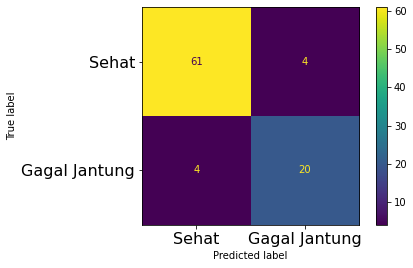

In [49]:
predict=lr.predict(x_test)
acc=accuracy_score(y_test,predict)
print("Akurasi :", "{:.2f}%".format(100*acc))
plot_confusion_matrix(lr, x_test, y_test)
plt.xticks(range(2), ["Sehat","Gagal Jantung"], fontsize=16)
plt.yticks(range(2), ["Sehat","Gagal Jantung"], fontsize=16)
plt.show()

### Hasil yang didapat menunjukan akurasi prediksi mencapai 91,01% dan TP mencapai 61 data, TN 20 data, FP 4 data dan FN 4 data

### Classification Report

In [50]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.83      0.83      0.83        24

    accuracy                           0.91        89
   macro avg       0.89      0.89      0.89        89
weighted avg       0.91      0.91      0.91        89



### Save Model

In [51]:
joblib_file = "heart_attack.pkl"  
joblib.dump(lr, joblib_file)

['heart_attack.pkl']

In [54]:
joblib.dump(sc, 'std_scaler.bin', compress=True)

['std_scaler.bin']

### Load Model and Testing Predict

In [52]:
lr_load = joblib.load('heart_attack.pkl')


lr_load

LogisticRegression(max_iter=10000)

In [58]:
testacc = lr_load.score(x_test, y_test)  
print("Testing Acc score: {0:.2f} %".format(100 * testacc))  

testpredict = lr_load.predict(x_test)  

testpredict

Testing Acc score: 91.01 %


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1])

In [55]:
x_test1=sc.inverse_transform(x_test)

In [56]:
x_test1

array([[ 63.  ,  60.  ,   1.2 , 145.  , 147.  ],
       [ 70.  ,  35.  ,   1.1 , 134.  , 208.  ],
       [ 58.  ,  25.  ,   1.3 , 132.  , 205.  ],
       [ 65.  ,  65.  ,   1.5 , 138.  ,  10.  ],
       [ 65.  ,  35.  ,   0.9 , 137.  , 146.  ],
       [ 85.  ,  45.  ,   3.  , 132.  ,  28.  ],
       [ 58.  ,  25.  ,   1.2 , 137.  , 170.  ],
       [ 65.  ,  25.  ,   1.2 , 136.  , 154.  ],
       [ 67.  ,  38.  ,   1.2 , 133.  , 245.  ],
       [ 61.  ,  40.  ,   0.9 , 141.  , 110.  ],
       [ 49.  ,  30.  ,   1.  , 138.  ,  12.  ],
       [ 78.  ,  50.  ,   1.4 , 138.  , 192.  ],
       [ 90.  ,  50.  ,   1.  , 134.  ,  30.  ],
       [ 51.  ,  40.  ,   0.9 , 134.  , 244.  ],
       [ 55.  ,  45.  ,   0.9 , 140.  ,  74.  ],
       [ 65.  ,  40.  ,   1.  , 136.  , 210.  ],
       [ 60.  ,  40.  ,   1.  , 141.  , 187.  ],
       [ 63.  ,  25.  ,   1.3 , 134.  ,  83.  ],
       [ 60.  ,  25.  ,   1.7 , 135.  ,  82.  ],
       [ 59.  ,  45.  ,   1.1 , 139.  , 121.  ],
       [ 50.  ,  20.